<a href="https://colab.research.google.com/github/alonsosilvaallende/COVID-19/blob/master/COVID_19_Known_Cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

In [2]:
total_cases = pd.read_csv("https://covid.ourworldindata.org/data/total_cases.csv", index_col='date')
total_cases[["France", "Italy"]].tail(3)

,France,Italy
date,,
2020-03-15,4469.0,21157.0
2020-03-16,5380.0,24747.0
2020-03-17,6573.0,27980.0


In [0]:
list_countries = ['France', 'Italy']

In [0]:
TIPPING_POINT = 100

In [0]:
France_lockdown = '2020-03-18'
Italy_lockdown = '2020-03-10'

In [0]:
France_schools = '2020-03-16'
Italy_schools = '2020-03-05'

In [0]:
cases = {}
for country in list_countries:
  cases[country] = total_cases[country][total_cases[country] > TIPPING_POINT]

In [8]:
France_gap = (pd.to_datetime(France_lockdown) - pd.to_datetime(cases["France"].keys()[0])).days
France_gap

15

In [9]:
France_gap_schools = (pd.to_datetime(France_schools) - pd.to_datetime(cases["France"].keys()[0])).days
France_gap_schools

13

In [10]:
Italy_gap = (pd.to_datetime(Italy_lockdown) - pd.to_datetime(cases["Italy"].keys()[0])).days
Italy_gap

15

In [11]:
Italy_gap_schools = (pd.to_datetime(Italy_schools) - pd.to_datetime(cases["Italy"].keys()[0])).days
Italy_gap_schools

10

On February 24, Italy reaches more than 100 cases, on March 4 Italy closes schools and universities, and on March 8 Italy imposes lockdown.

On March 3, France reaches more than 100 cases, on March 16 (13 days later) France is closing schools and universities.

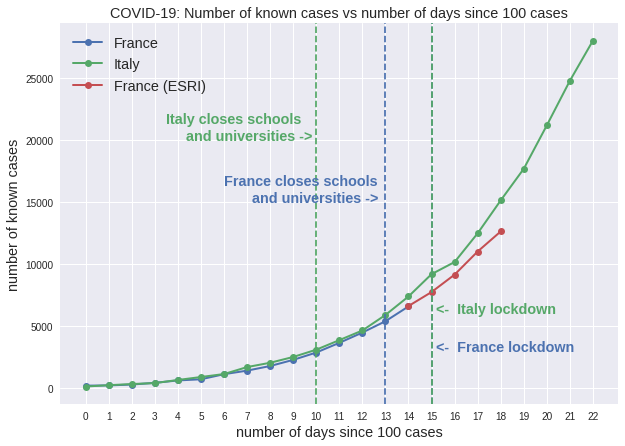

In [12]:
fig, ax = plt.subplots(figsize=(10,7))
for country in list_countries:
  plt.plot(np.arange(len(cases[country])), cases[country],label=country, linewidth=2, marker='o')
plt.plot(np.array([14, 15, 16, 17, 18]), np.array([6604, 7730, 9134, 10995, 12612]), label='France (ESRI)', linewidth=2, marker='o')
plt.axvline(France_gap, color='C0', linestyle='dashed')
plt.axvline(Italy_gap, color='C1', linestyle='dashed')
plt.axvline(Italy_gap_schools, color='C1', linestyle='dashed')
plt.axvline(France_gap_schools, color='C0', linestyle='dashed')
plt.annotate('<-  Italy lockdown', (Italy_gap,6000.0), xytext=(Italy_gap+0.2,6000.0), color='C1', fontsize='x-large', fontweight='bold')
plt.annotate('<-  France lockdown', (France_gap,3000.0), xytext=(France_gap+0.2,3000.0), color='C0', fontsize='x-large', fontweight='bold')
plt.annotate('Italy closes schools\n     and universities ->', (Italy_gap_schools,27000.0), \
             xytext=(Italy_gap_schools-6.5,20000.0), color='C1', fontsize='x-large', fontweight='bold')
plt.annotate('France closes schools\n       and universities ->', (France_gap_schools,23000.0), \
             xytext=(France_gap_schools-7,15000.0), color='C0', fontsize='x-large', fontweight='bold')
ax.set_title('COVID-19: Number of known cases vs number of days since 100 cases', fontsize='x-large')
ax.set_xlabel('number of days since 100 cases', fontsize='x-large')
ax.set_ylabel('number of known cases', fontsize='x-large')
ax.set_xticks(np.arange(len(cases["Italy"])))
plt.legend(fontsize='x-large')
plt.show()

In logarithmic scale:

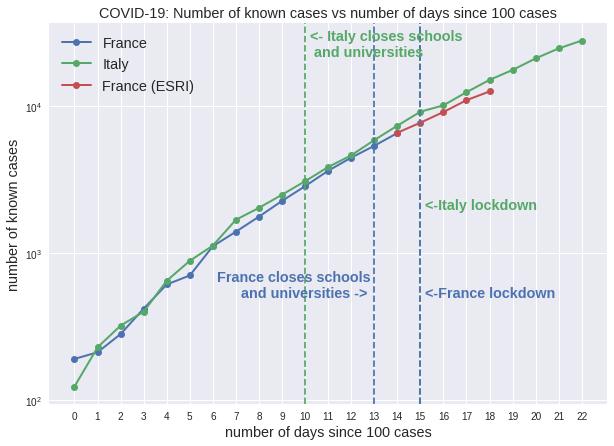

In [13]:
fig, ax = plt.subplots(figsize=(10,7))
for country in list_countries:
  plt.plot(np.arange(len(cases[country])), cases[country], label=country, linewidth=2, marker='o')
plt.plot(np.array([14, 15, 16, 17, 18]), np.array([6604, 7730, 9134, 10995, 12612]), label='France (ESRI)', linewidth=2, marker='o')
plt.axvline(Italy_gap_schools, color='C1', linestyle='dashed')
plt.axvline(France_gap_schools, color='C0', linestyle='dashed')
plt.axvline(Italy_gap, color='C1', linestyle='dashed')
plt.axvline(France_gap, color='C0', linestyle='dashed')

plt.annotate('<-Italy lockdown', (Italy_gap,2000.0), xytext=(Italy_gap+0.2,2000.0), color='C1', fontsize='x-large', fontweight='bold')
plt.annotate('<-France lockdown', (France_gap,500.0), xytext=(France_gap+0.2,500.0), color='C0', fontsize='x-large', fontweight='bold')

plt.annotate('<- Italy closes schools\n and universities', (Italy_gap_schools,22000.0), \
             xytext=(Italy_gap_schools+0.2,22000.0), color='C1', fontsize='x-large', fontweight='bold')
plt.annotate('France closes schools\n      and universities ->', (France_gap_schools,1000.0), \
             xytext=(France_gap_schools-6.8,500.0), color='C0', fontsize='x-large', fontweight='bold')

ax.set_title('COVID-19: Number of known cases vs number of days since 100 cases', fontsize='x-large')
ax.set_xlabel('number of days since 100 cases', fontsize='x-large')
ax.set_ylabel('number of known cases', fontsize='x-large')
ax.set_xticks(np.arange(len(cases["Italy"])))
plt.yscale("log")
plt.legend(fontsize='x-large')
plt.show()